# I. Tutorial de pandas

El siguiente tutorial fue elaborado por Alejandro Vargas Chaves (200932185) por motivo de investigación personal en el curso de reconocimiento de patrones.

## 1. Introducción 

Pandas es una biblioteca open source, la cual provee alto desempeño, estructuras de datos fáciles de usar y utilidades de analisis de datos para el lenguaje de programación python. Puede utilizar el siguiente enlace para mayor referencia https://pandas.pydata.org/

### 1.1 Instalación

Solamente se requiere utilizar el siguiente comando en terminal 

conda install pandas

### 1.2 Uso

Para utilizar la biblioteca se requiere hacer un import en el lenguaje python como se observa a continuación:



In [1]:
import pandas as pd

## 2. Cargando archivos en Pandas

Pandas como se comentó anteriormente, Pandas permite cargar datos de diversas fuentes de archivos o bases de datos. Para importar un set de datos de un csv se utiliza el siguiente comando read_csv(). Se debe poner la ruta dentro de los parentesis.

In [2]:
equipos = pd.read_csv('equipos_futbol.csv')


## 3. Utilizando datos en pandas

Padas permite utilizar datos almacenados en archivos como .csv o bases de datos. Para analizar datos en pandas se deben utilizar estructuras de datos compatibles con pandas. 

### 3.1 Estructuras de datos de pandas

Las principales estructuras de datos son: Series y DataFrames

#### 3.1.1 Series

La serie corresponde a una estructura de una sola dimension 

In [3]:
data = ['Alejandro','Pablo','Daniel','Fernando','Juan Carlos']
 
ser = pd.Series(data)
print(ser)

0      Alejandro
1          Pablo
2         Daniel
3       Fernando
4    Juan Carlos
dtype: object


Los elementos dentro de una serie se pueden acceder por medio de indices [posicion] y tambien se puede utilizar slicing de python[posicion:posicion] para obtener un subset de datos

In [4]:
ser = pd.Series(data)
print(ser[0])
print("Obtener un subset de datos")
print(ser[:3])

Alejandro
Obtener un subset de datos
0    Alejandro
1        Pablo
2       Daniel
dtype: object


#### 3.1.2 DataFrames

El dataframe consiste en una estructura de multiples dimensiones. Es decir representa una tabla de filas y columnas. Cada columnda tiene nombres y las filas indices.

In [5]:
 
lista = {'Equipo':['Sapprissa', 'Alajuela', 'Heredia', 'Cartago'],
        'Puntos':[27, 26, 23, 23], 'Goles a favor':[33,26,20,14], 'Goles en contra':[10,12,14,8]}
 
df = pd.DataFrame(lista)
print(df)

      Equipo  Puntos  Goles a favor  Goles en contra
0  Sapprissa      27             33               10
1   Alajuela      26             26               12
2    Heredia      23             20               14
3    Cartago      23             14                8


Se pueden manejar los datos de forma que solo se obtenga la información de algunas columnas

In [6]:
df = pd.DataFrame(lista)
print(df[['Equipo', 'Puntos']])

      Equipo  Puntos
0  Sapprissa      27
1   Alajuela      26
2    Heredia      23
3    Cartago      23


#### 3.1.2.1 Selección por filas

Los dataframes contienen meotodos para el acceso por filas por medio de los métodos de loc, iloc y ix

In [7]:
data = pd.read_csv('Demographic_Statistics_By_Zip_Code.csv')
traffic = pd.read_csv('Traffic_Violations.csv')
uk_500 = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
#dataset tomado de https://catalog.data.gov/dataset?res_format=CSV


In [8]:
print(data.iloc[0])# primera fila

JURISDICTION NAME                      10001.00
COUNT PARTICIPANTS                        44.00
COUNT FEMALE                              22.00
PERCENT FEMALE                             0.50
COUNT MALE                                22.00
PERCENT MALE                               0.50
COUNT GENDER UNKNOWN                       0.00
PERCENT GENDER UNKNOWN                     0.00
COUNT GENDER TOTAL                        44.00
PERCENT GENDER TOTAL                     100.00
COUNT PACIFIC ISLANDER                     0.00
PERCENT PACIFIC ISLANDER                   0.00
COUNT HISPANIC LATINO                     16.00
PERCENT HISPANIC LATINO                    0.36
COUNT AMERICAN INDIAN                      0.00
PERCENT AMERICAN INDIAN                    0.00
COUNT ASIAN NON HISPANIC                   3.00
PERCENT ASIAN NON HISPANIC                 0.07
COUNT WHITE NON HISPANIC                   1.00
PERCENT WHITE NON HISPANIC                 0.02
COUNT BLACK NON HISPANIC                

In [9]:
print(data.iloc[0:2]) # primeras 2 filas

   JURISDICTION NAME  COUNT PARTICIPANTS  COUNT FEMALE  PERCENT FEMALE  \
0              10001                  44            22            0.50   
1              10002                  35            19            0.54   

   COUNT MALE  PERCENT MALE  COUNT GENDER UNKNOWN  PERCENT GENDER UNKNOWN  \
0          22          0.50                     0                       0   
1          16          0.46                     0                       0   

   COUNT GENDER TOTAL  PERCENT GENDER TOTAL  ...  COUNT CITIZEN STATUS TOTAL  \
0                  44                   100  ...                          44   
1                  35                   100  ...                          35   

   PERCENT CITIZEN STATUS TOTAL  COUNT RECEIVES PUBLIC ASSISTANCE  \
0                           100                                20   
1                           100                                 2   

   PERCENT RECEIVES PUBLIC ASSISTANCE  COUNT NRECEIVES PUBLIC ASSISTANCE  \
0                   

In [10]:
print(data.iloc[0:5, 0:2]) # primeras 2 filas con un subset de columnas

   JURISDICTION NAME  COUNT PARTICIPANTS
0              10001                  44
1              10002                  35
2              10003                   1
3              10004                   0
4              10005                   2


La opcion de loc nos permite obtener datos de filas utilizando igualdades con llaves predefinidas. Por ejemplo para obtener la cantidad de multas registradas en Rockville por exceder el limite de 35MPH se puede seguir el siguiente ejemplo:

In [11]:
traffic.set_index("SubAgency", inplace=True) #ubicamos el indice a una columna especifica
traffic.head()
print(len(traffic.loc[["1st District, Rockville","EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH"],["Date Of Stop"
]])) 

64


/home/alejandro/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


## 4. Operaciones en Pandas sobre dataFrames

Sobre los dataFrames se pueden realizar las operaciones add(), sub(), mul(), div()

In [12]:
#print(equipos.iloc[:,:3]) prueba para observar las columnas 
equipos["Rendimiento"]=equipos[["PG"]].div(equipos.PJ, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)

                           Equipos  PJ  PG  PE  PP  GF   GC  Pts  Rendimiento
0                        Herediano  44  29  12   3  75   26   99     0.659091
1               Deportivo Saprissa  44  26   9   9  93   48   87     0.590909
2               Santos de Guápiles  44  21  16   7  76   44   79     0.477273
3                 L.D. Alajuelense  44  21  11  12  84   56   74     0.477273
4                    Pérez Zeledón  44  17  13  14  71   65   64     0.386364
5                       Limón F.C.  44  14  16  14  66   67   58     0.318182
6                 Municipal Grecia  44  14  13  17  58   71   55     0.318182
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60   45     0.227273
8                   Guadalupe F.C.  44  10  15  19  50   68   45     0.227273
9                   A.D. Carmelita  44  11  10  23  55   77   43     0.250000
10                 C.S. Cartaginés  44   5  20  19  43   70   35     0.113636
11               Municipal Liberia  44   7   8  29  41  101   29

In [13]:
equipos["Puntos_solo_victorias"]=equipos[["PG"]].mul(3, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)

                           Equipos  PJ  PG  PE  PP  GF   GC  Pts  Rendimiento  \
0                        Herediano  44  29  12   3  75   26   99     0.659091   
1               Deportivo Saprissa  44  26   9   9  93   48   87     0.590909   
2               Santos de Guápiles  44  21  16   7  76   44   79     0.477273   
3                 L.D. Alajuelense  44  21  11  12  84   56   74     0.477273   
4                    Pérez Zeledón  44  17  13  14  71   65   64     0.386364   
5                       Limón F.C.  44  14  16  14  66   67   58     0.318182   
6                 Municipal Grecia  44  14  13  17  58   71   55     0.318182   
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60   45     0.227273   
8                   Guadalupe F.C.  44  10  15  19  50   68   45     0.227273   
9                   A.D. Carmelita  44  11  10  23  55   77   43     0.250000   
10                 C.S. Cartaginés  44   5  20  19  43   70   35     0.113636   
11               Municipal L

In [14]:
equipos["PJ2"]=equipos[["PG"]].add(equipos.PE, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)                            

                           Equipos  PJ  PG  PE  PP  GF   GC  Pts  Rendimiento  \
0                        Herediano  44  29  12   3  75   26   99     0.659091   
1               Deportivo Saprissa  44  26   9   9  93   48   87     0.590909   
2               Santos de Guápiles  44  21  16   7  76   44   79     0.477273   
3                 L.D. Alajuelense  44  21  11  12  84   56   74     0.477273   
4                    Pérez Zeledón  44  17  13  14  71   65   64     0.386364   
5                       Limón F.C.  44  14  16  14  66   67   58     0.318182   
6                 Municipal Grecia  44  14  13  17  58   71   55     0.318182   
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60   45     0.227273   
8                   Guadalupe F.C.  44  10  15  19  50   68   45     0.227273   
9                   A.D. Carmelita  44  11  10  23  55   77   43     0.250000   
10                 C.S. Cartaginés  44   5  20  19  43   70   35     0.113636   
11               Municipal L

Se puede utilizar tambien la siguiente sintaxis

In [15]:
ganados=pd.DataFrame()
ganados["Equipos"]=equipos["Equipos"]
ganados["Jugados"]=equipos["PG"]+equipos["PE"]+equipos["PP"]    
print(ganados)

                           Equipos  Jugados
0                        Herediano       44
1               Deportivo Saprissa       44
2               Santos de Guápiles       44
3                 L.D. Alajuelense       44
4                    Pérez Zeledón       44
5                       Limón F.C.       44
6                 Municipal Grecia       44
7   Universidad de Costa Rica F.C.       44
8                   Guadalupe F.C.       44
9                   A.D. Carmelita       44
10                 C.S. Cartaginés       44
11               Municipal Liberia       44


In [16]:
equipos["Diff"]=equipos[["GF"]].sub(equipos.GC, axis=0) #se agrega una columna para verificar el rendimiento del equipo
print(equipos)

                           Equipos  PJ  PG  PE  PP  GF   GC  Pts  Rendimiento  \
0                        Herediano  44  29  12   3  75   26   99     0.659091   
1               Deportivo Saprissa  44  26   9   9  93   48   87     0.590909   
2               Santos de Guápiles  44  21  16   7  76   44   79     0.477273   
3                 L.D. Alajuelense  44  21  11  12  84   56   74     0.477273   
4                    Pérez Zeledón  44  17  13  14  71   65   64     0.386364   
5                       Limón F.C.  44  14  16  14  66   67   58     0.318182   
6                 Municipal Grecia  44  14  13  17  58   71   55     0.318182   
7   Universidad de Costa Rica F.C.  44  10  15  19  43   60   45     0.227273   
8                   Guadalupe F.C.  44  10  15  19  50   68   45     0.227273   
9                   A.D. Carmelita  44  11  10  23  55   77   43     0.250000   
10                 C.S. Cartaginés  44   5  20  19  43   70   35     0.113636   
11               Municipal L

## 5. Visualizando datos

Pandas se puede combinar con algunas otras librerias para poder visualizar los datos 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

Se debe definir un eje x y apartir de una serie o dataframe y utilizar las funciones de plot

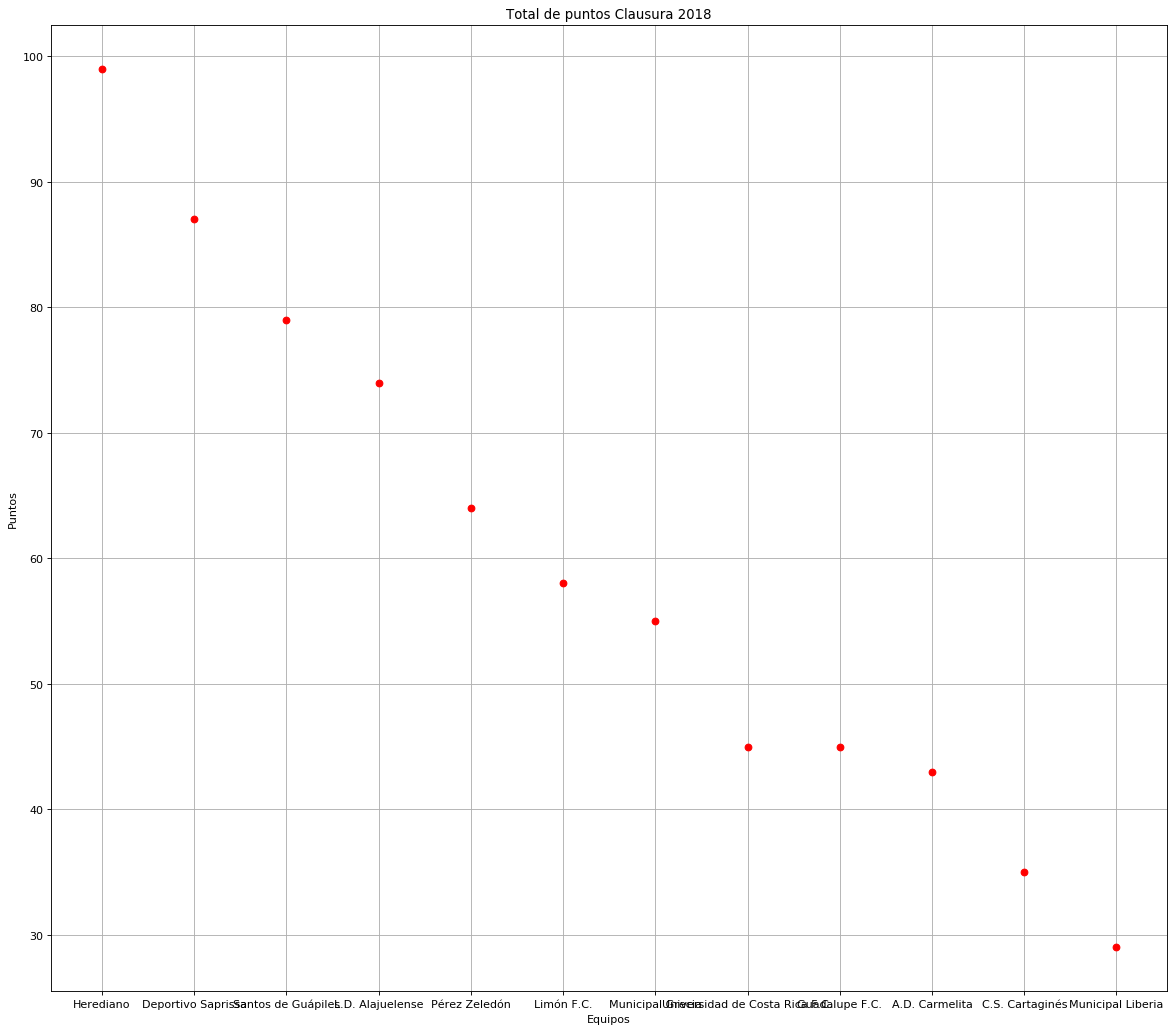

In [18]:
teams = equipos["Equipos"]

puntos = equipos["Pts"]

fig, ax = plt.subplots(figsize=(18, 16), dpi= 80)
ax.plot(teams, puntos, 'ro')

ax.set(xlabel='Equipos', ylabel='Puntos',
       title='Total de puntos Clausura 2018')
ax.grid()
plt.show()



# II Parte, análisis exploratorio de datos

La siguiente sección contiene ejemplos de como utilizar Pandas con datos reales, la sección enriquece aún más las operaicones básicas vistas anteriormente. Se profundiza un poco más la visualización de datos y las operaciones y métodos sobre los dataframes

# 1. Visualizando algunas relaciones

Utilizando los datos demograficos de US podemos realizar un estudio de los datos utilizando pandas

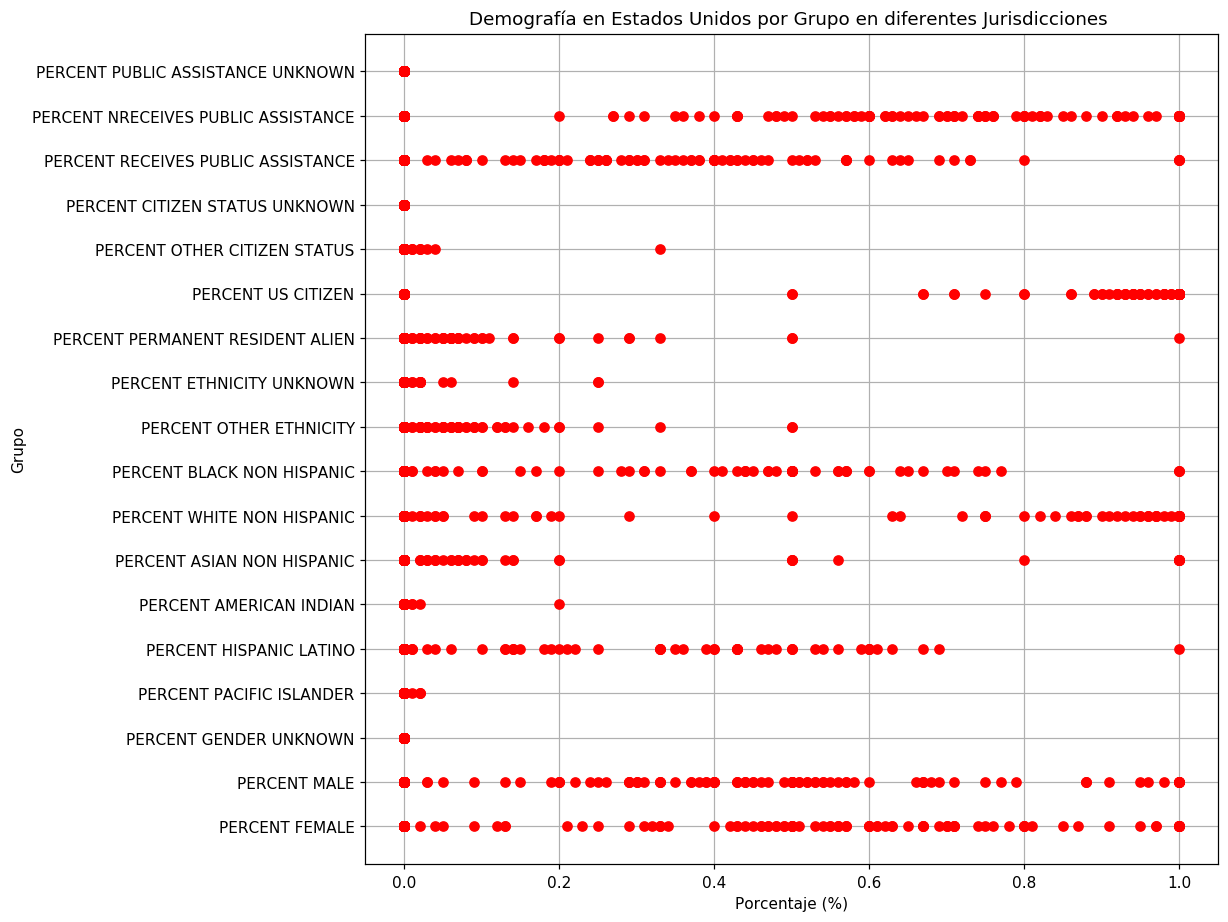

In [19]:
demo_name = data.columns[3::2] # obtenemos las columnas que no contienen datos no porcentuales
#Lets remove some columns that only reflect total data
demo_name=demo_name.drop(labels=["PERCENT GENDER TOTAL","PERCENT ETHNICITY TOTAL","PERCENT CITIZEN STATUS TOTAL","PERCENT PUBLIC ASSISTANCE TOTAL"])
demographic = data.iloc[0:,3::2]
#Lets remove some columns that only reflect total data
demographic= demographic.drop(columns=["PERCENT GENDER TOTAL","PERCENT ETHNICITY TOTAL","PERCENT CITIZEN STATUS TOTAL","PERCENT PUBLIC ASSISTANCE TOTAL"])
fig, ax = plt.subplots(figsize=(10, 10), dpi= 110)
#we need to transpose the dataframe so that the dimensions are the same to be represented on the graph
ax.plot(demographic.T,demo_name,'ro')

ax.set(xlabel='Porcentaje (%)', ylabel='Grupo',
       title='Demografía en Estados Unidos por Grupo en diferentes Jurisdicciones ')
ax.grid()
plt.show()



Notese que la visualización anterior no es clara con respecto a cuales jurisdicciones hay mayor o menor cantidad de grupos específicos (hispanos por ejemplo). Sin embargo se puede notar que hay una cantidad significativa baja de nativos americanos en las jurisdicciones de las cuales se tomaron los datos

Si quisieramos profundizar en ciertos datos, podriamos visualizar por zona específica el porcentaje de nativos americanos

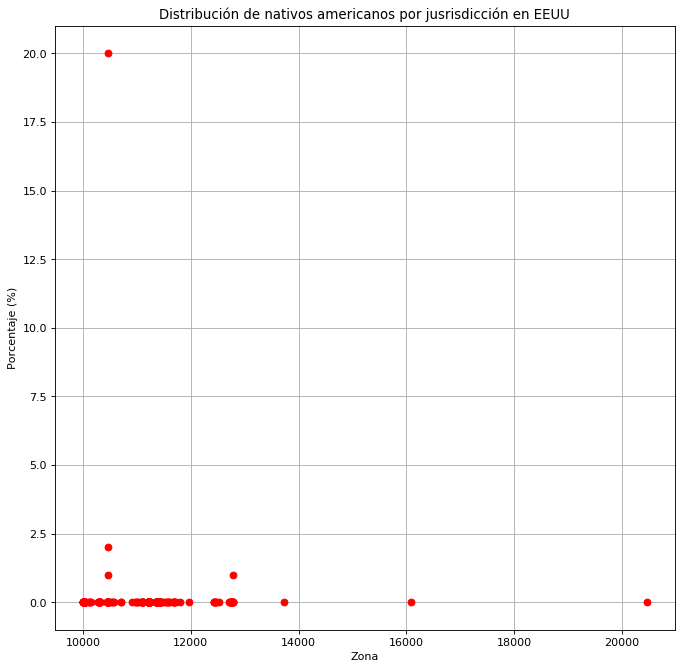

In [20]:
american_indian = data["PERCENT AMERICAN INDIAN"].mul(100, axis=0) #obtenemos los pocentajes de nativos americanos

zona= data["JURISDICTION NAME"] #obtenemos la jurisdicción
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80)
ax.plot(zona,american_indian,'ro')
ax.set(xlabel='Zona', ylabel='Porcentaje (%)',
       title='Distribución de nativos americanos por jusrisdicción en EEUU')
ax.grid()
plt.show()

Podemos observar entonces que solamente de una de las zonas estudiadas el porcentaje de nativos americanos es mayor al 20%

# 2. Realizando análisis por medio de operaciones

Podemos tambien utilizar pandas para obtener por grupo estudiado en cual jusrisdicción se logro mayor registro de cada grupo específico.

## 2.1 Iniciando por operaciones sencillas

Tratemos por ejemplo de obtener solamente 

In [21]:
max_nativos= data["PERCENT AMERICAN INDIAN"].values.argmax() #obtenemos de cual linea se obtuvo el máximo valor de nativos
print("La jusrisdicción %d contiene un porcentaje de %d de nativos americanos" % (data["JURISDICTION NAME"][max_nativos]*100, data["PERCENT AMERICAN INDIAN"][max_nativos]*100))

La jusrisdicción 1045600 contiene un porcentaje de 20 de nativos americanos


Expandamos la implementación para obtener el máximo de cada uno 

In [22]:
max_per_column=demographic.idxmax(axis=0, skipna=True) #obtenemos la linea de donde se obtuvo el maximo por columna

def printData(x):
    return data["JURISDICTION NAME"][x] #creamos una funcion para obtener la jusridccion de donde se obtuvo el maximo
modDfObj = max_per_column.apply(printData)
output = pd.DataFrame([modDfObj,max_per_column]).T #creamos un dataframe a partir de 2 series y aplicamos transpuesta
output.columns = ['Jurisdiccion', 'Máximo']#nombremos la columna
#el siguiente print muestra el dataframe con los datos compuestos de jursidccion y maximo por grupo 
print(output)

                                     Jurisdiccion  Máximo
PERCENT FEMALE                              10003       2
PERCENT MALE                                10007       6
PERCENT GENDER UNKNOWN                      10001       0
PERCENT PACIFIC ISLANDER                    10461      68
PERCENT HISPANIC LATINO                     11372     157
PERCENT AMERICAN INDIAN                     10456      63
PERCENT ASIAN NON HISPANIC                  10003       2
PERCENT WHITE NON HISPANIC                  11206     107
PERCENT BLACK NON HISPANIC                  11419     173
PERCENT OTHER ETHNICITY                     11354     141
PERCENT ETHNICITY UNKNOWN                   10024      21
PERCENT PERMANENT RESIDENT ALIEN            11354     141
PERCENT US CITIZEN                          10003       2
PERCENT OTHER CITIZEN STATUS                10462      69
PERCENT CITIZEN STATUS UNKNOWN              10001       0
PERCENT RECEIVES PUBLIC ASSISTANCE          10007       6
PERCENT NRECEI

Del ejemplo anterior es importante recalcar que la biblioteca de pandas nos permite realizar operaciones complejas por medio de sus métodos. Notese como no se requirió implementar ningún bucle para obtener los máximos o bien para obtener las jurisdicciones 

# 3. Concluciones
- Se logra explorar la biblioteca Pandas en funcionalidades basicas como generar gráficos y operar sobre datos
- Pandas utiliza series y dataframes para manipular sus datos, los cuales pueden ser importados por un csv, generados por el usuario o bien generados a partir de otras operaciones
- La biblioteca es aún más robusta que los ejemplos implementados con anterioridad pero se logra al menos generar una documentación suficiente para implementar soluciones sencillas con Pandas
